In [49]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [50]:
data=pd.read_csv('C:/Users/sai kiran/Desktop/export_dataframe.csv')
data.head()

,year,emp_length_int,home_ownership_cat,income_cat,loan_amount,term_cat,purpose_cat,interest_payment_cat,loan_condition,interest_rate,grade_cat,installment,region
0,4,2,1,1,0,1,1,1,1,2,2,0,4
1,4,0,1,1,0,2,2,2,0,3,3,0,0
2,4,2,1,1,0,1,3,2,1,3,3,0,3
3,4,2,1,1,1,1,4,2,1,2,3,1,1
4,4,0,1,1,0,2,4,1,1,2,2,0,1


In [51]:
y=data['loan_condition'].values
y=y.reshape(-1, 1)
data.drop('loan_condition',axis=1,inplace=True)
x=data.values
print(x.shape,y.shape)

(887344, 12) (887344, 1)


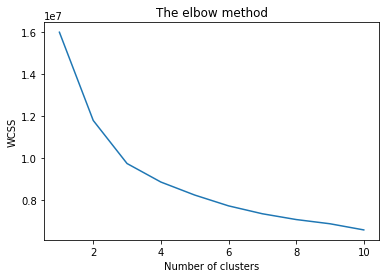

In [6]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [52]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
x=svd.fit_transform(x)
print(x.shape,y.shape)

(887344, 2) (887344, 1)


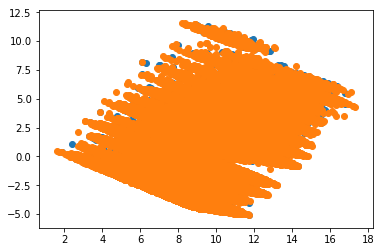

In [53]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
clusters = [0,1]
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(y == cluster)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

In [54]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)

x,y=sm.fit_sample(x, y.ravel())
print(x.shape,y.shape)

(1639842, 2) (1639842,)


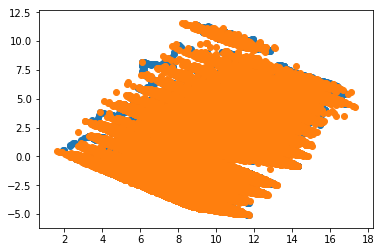

In [55]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
clusters = [0,1]
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(y == cluster)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

In [76]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
yhat = kmeans.fit_predict(x)

In [77]:
yhat

array([1, 1, 1, ..., 2, 2, 1])

In [78]:
x

array([[ 5.71409452, -2.05618374],
       [ 6.09144957, -0.80358503],
       [ 7.18309125, -0.36865201],
       ...,
       [11.16299728, -1.53000919],
       [10.79146038,  0.46989183],
       [ 7.15690441, -2.54726643]])

In [79]:
unique(yhat)

array([0, 1, 2])

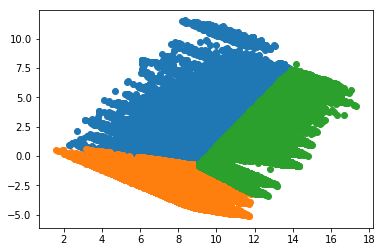

In [80]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
clusters = [0,1,2]
# create scatter plot for samples from each cluster
for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

In [81]:
indx=where(yhat == 0)
x1=x[indx]
y1=y[indx]
print(x1.shape,y1.shape)
indx=where(yhat == 1)
x2=x[indx]
y2=y[indx]
print(x2.shape,y2.shape)
indx=where(yhat == 2)
x3=x[indx]
y3=y[indx]
print(x3.shape,y3.shape)

(390379, 2) (390379,)
(376915, 2) (376915,)
(872548, 2) (872548,)


In [82]:
a,b=np.unique(y1,return_counts=True)
print('good count:',b[0]/(b[0]+b[1])*100)
print('bad count:',b[1]/(b[0]+b[1])*100)

good count: 61.3670305011284
bad count: 38.63296949887161


In [83]:
a,b=np.unique(y2,return_counts=True)
print('good count:',b[0]/(b[0]+b[1])*100)
print('bad count:',b[1]/(b[0]+b[1])*100)

good count: 44.08739370945704
bad count: 55.91260629054297


In [84]:
a,b=np.unique(y3,return_counts=True)
print('good count:',b[0]/(b[0]+b[1])*100)
print('bad count:',b[1]/(b[0]+b[1])*100)

good count: 47.46844872717604
bad count: 52.53155127282396


In [85]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,confusion_matrix


### Cluster 1

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,Perceptron
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30)
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
pred=logistic.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.6118055911334256


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.3059027955667128, 0.5, 0.3795777818981273, None)

In [109]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.7657581501784586


(0.7587916445556131, 0.7377865197778297, 0.7442385542709342, None)

In [98]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.6135560223372098


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.3067780111686049, 0.5, 0.38025083346562943, None)

In [113]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=25,random_state=0)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.7750823983469098


(0.7753886446130591, 0.7414594598681501, 0.7501030963695705, None)

### Cluster 2

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,Perceptron
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.30)
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
pred=logistic.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.6012911784214017


(0.606023435183203, 0.5637275781351972, 0.5341965518650401, None)

In [101]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.8240902056157418


(0.8215098278411769, 0.8213620470422586, 0.8214352014626589, None)

In [102]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.5977802343577272


(0.5939599142870746, 0.5640508782423468, 0.5427228234842758, None)

In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.8336502321468052


(0.8309051899662094, 0.8329254745663649, 0.8317442052419051, None)

### Cluster 3

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,Perceptron
x_train,x_test,y_train,y_test = train_test_split(x3,y3,test_size=0.30)
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
pred=logistic.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.5261092965064085


(0.5157173651692276, 0.5056315227088879, 0.4208094093688969, None)

In [105]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.795045174106546


(0.7947063430942853, 0.794161502403472, 0.7943811962104121, None)

In [117]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.7995453937692205


(0.7989990166493003, 0.7992327239447018, 0.7991020396800981, None)

In [107]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print(accuracy_score(pred,y_test))
confusion_matrix(pred,y_test)
precision_recall_fscore_support(y_test, pred, average='macro')

0.5320459190495291


(0.5343578778205345, 0.5127456849133386, 0.4311268849044899, None)